## Tutorial 7a - Measuring $\mu$

The purpose of this tutorial is to understand the concept of specific growth rate ($\mu$). Remember the following definition that you have used before:

$$ r_x = \mu \Rightarrow \frac{g \,X}{g \,X \cdot h} \Rightarrow \frac{1}{h}$$
-------------------------

To illustrate the $\mu$ concept we will use aerobic growth of _Escherichia coli_. Higher biomass concentrations ($C_X$) is typically associated by an increase in turbidity as can be seen in the **time progression of a single test tube** below. The suspended biomass concentration can be quantified via spectrophotometry.

<img src="Tut7a.png" width="800" />



In [105]:
from numpy import log, array, exp, linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

a) Start by plotting $C_X$ against time, what do you see?

The equation linking $\mu$ to $C_X$ is the following:

$$\frac{dC_X}{dt}=\mu C_X $$  

In [106]:
data = array([[0,0.100],
              [15,0.114],
              [30,0.130],
              [45,0.148],
              [60,0.168],
              [90,0.218],
              [120,0.283],
              [150,0.367],
              [180,0.476],
              [210,0.617],
              [240,0.800],
              [300,1.346],
              [500,1.440]])
texp = data[:,0]
Cxexp = data[:,1]

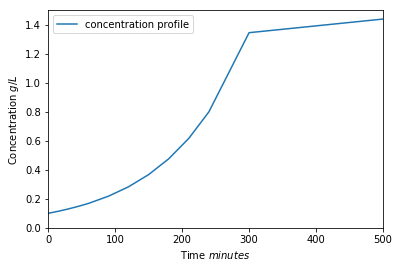

In [107]:
plt.plot(texp,Cxexp,'-', label = 'concentration profile')
plt.axis([0,500, 0, 1.5])
plt.legend(loc='best')
plt.ylabel("Concentration $g/L$")
plt.xlabel("Time $minutes$")
plt.show()

b) It is easy to solve the above equation analytically, but for now we will solve it numerically using the background form [chapter 5.2](https://nbviewer.jupyter.org/github/willienicol/Biochemical-engineering-notes/blob/master/5%20Basic%20bioreactor%20modeling/Solving%20differential%20equations.ipynb).
Choose arbitrary values for $\mu$ and plot the solution together with the experimental data in (a) on a single graph. Remember that $C_X =0.1 \frac{g}{L}$ at time zero. Note that by definition $\mu$ has unit of $\frac{1}{h}$. Explain your graph to your friends.

In [108]:
mu1 = 0.518/60 #[1/min]

def conc(C, t):
    C=C[0]
    return [mu1*C]

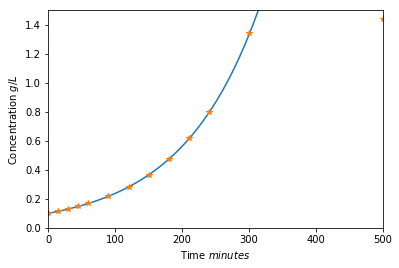

(array([[0.1       ],
        [0.10086882],
        [0.10174519],
        [0.10262918],
        [0.10352083],
        [0.10442022],
        [0.10532744],
        [0.10624254],
        [0.10716559],
        [0.10809667],
        [0.10903583],
        [0.10998315],
        [0.1109387 ],
        [0.11190255],
        [0.11287478],
        [0.11385546],
        [0.11484465],
        [0.11584244],
        [0.1168489 ],
        [0.1178641 ],
        [0.11888812],
        [0.11992104],
        [0.12096293],
        [0.12201388],
        [0.12307395],
        [0.12414324],
        [0.12522181],
        [0.12630976],
        [0.12740716],
        [0.12851409],
        [0.12963065],
        [0.1307569 ],
        [0.13189293],
        [0.13303884],
        [0.1341947 ],
        [0.13536061],
        [0.13653664],
        [0.1377229 ],
        [0.13891945],
        [0.14012641],
        [0.14134385],
        [0.14257187],
        [0.14381056],
        [0.14506   ],
        [0.14632031],
        [0

In [109]:
tspan = linspace(0,500,500)

vals = odeint(conc,0.1,tspan)

plt.plot(tspan,vals,'-',texp,Cxexp,'*')
plt.axis([0,500, 0, 1.5])
plt.ylabel("Concentration $g/L$")
plt.xlabel("Time $minutes$")
plt.show()
vals, tspan

c) By what fraction does the biomass increase every hour and does this fraction vary with time? [$1-\frac{C_X}{C_{Xo}}=0.68$] 

In [110]:
hrlyC = [vals[0],vals[60],vals[120],vals[180],vals[240],vals[300]]
hrlyC

[array([0.1]),
 array([0.16804105]),
 array([0.28237796]),
 array([0.47451088]),
 array([0.79737309]),
 array([1.33991414])]

In [111]:
conc0 = 0.1

for i in hrlyC:
    delta= ((i-conc0)/conc0)
    conc0=i
    print(delta)

[0.]
[0.68041055]
[0.68041056]
[0.68041047]
[0.68041054]
[0.68041054]


The fraction increase in biomass for the theory values is 0.68

d) mu in b) was changed until the theory values lined up with the experimental values provided. The final mu for best fit was 0.518[1/h]. This is smaller as the steps taken for the odeint function are a lot smaller than the mu of 0.68 taken as a change over a range of 60 minutes intervals. 

e) Why does CX increase so little over the last 200 minutes?
As discussed in class, the reasons vary from glucose running out to feed the bacteria and/or the product concentration reaches a point where it begins killing off the bacteria, therefore the rate of production drops.

The initial glucose concentration ($C_{So}$) in the test tube was 3.19 $\frac{g}{L}$. You can assume that $Y_{SX}=0.42 \frac{g}{g}$ at all times. The consumption of glucose can accordingly be modelled by:

$$\frac{dC_S}{dt}=-Y_{XS}\cdot \mu \cdot C_X $$ 
---

f) Use the glucose and biomass equations simultaneously to obtain the glucose and biomass concentration profiles as a function of time. Note the difference between $Y_{SX}$ and $Y_{XS}$. What happens to the glucose after 300 min?

In [112]:
def gluc(C,t):
    Cx=C[0]
    return[-(1/0.42)*mu1*Cx]

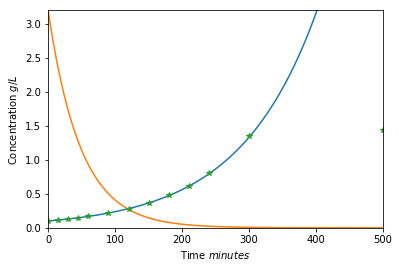

In [113]:
tspan1 = linspace(0,500,500)

glucs= odeint(gluc,3.19,tspan)

plt.plot(tspan,vals,'-',tspan1,glucs,'-',texp,Cxexp,'*')
plt.axis([0,500, 0, 3.2])
plt.ylabel("Concentration $g/L$")
plt.xlabel("Time $minutes$")
plt.show()


The following mathematical function stops biomass growth if no glucose is available:

$$\mu = \mu_{max}\left[\frac{Cs}{K_m+Cs} \right]$$ 
---
Use your fitted $\mu$ value as $\mu_{max}$ and a $K_m$ value of 0.001 $\frac{g}{L}$.

g) Re-run the multiple differential equation in (f)? What do you see?

<img src="t7plot1.png" width="400" />

In [114]:
mumax=0.518/60
km=0.001
Cxo=0.1
Cso=3.19

In [115]:
def lastditch(C,t):
    Cx,Cs = C[0],C[1]
    mu = mumax*(Cs/(km + Cs))
    dCxdt = mu*Cx
    dCsdt = -(1/0.42)*mu*Cx
    return [dCxdt,dCsdt]

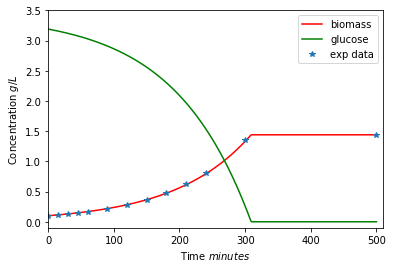

In [122]:
time=linspace(0,500,500)

finalG = odeint(lastditch,[Cxo,Cso],time)

Cx=finalG[:,0]
Cs=finalG[:,1]

plt.plot(time, Cx, color='red', label='biomass')
plt.plot(time, Cs, color='green',label='glucose')
plt.plot(texp,Cxexp,'*',label='exp data')
plt.axis([0,510, -0.1, 3.5])
plt.legend(loc='best')
plt.ylabel("Concentration $g/L$")
plt.xlabel("Time $minutes$")
plt.show()


h) Increase the value of $K_m$ to 0.5 $\frac{g}{L}$. Explain the response. 

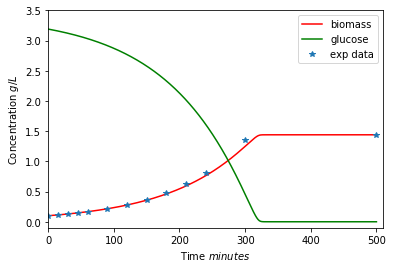

In [123]:
mumax=0.518/60
km=0.05
Cxo=0.1
Cso=3.19

def reallylastditch(C,t):
    Cx,Cs = C[0],C[1]
    mu = mumax*(Cs/(km + Cs))
    dCxdt = mu*Cx
    dCsdt = -(1/0.42)*mu*Cx
    return [dCxdt,dCsdt]

time1=linspace(0,500,500)

finalGa = odeint(reallylastditch,[Cxo,Cso],time1)

Cx=finalGa[:,0]
Cs=finalGa[:,1]

plt.plot(time, Cx, color='red', label='biomass')
plt.plot(time, Cs, color='green',label='glucose')
plt.plot(texp,Cxexp,'*',label='exp data')
plt.axis([0,510, -0.1, 3.5])
plt.legend(loc='best')
plt.ylabel("Concentration $g/L$")
plt.xlabel("Time $minutes$")
plt.show()

Increasing Km decreases mu, making rate of biomass production slightly lower, which shifts the graph slightly to the right but the end points are the same